# Task 2: Specie Segmentation using K- Means to predict the optimum number of cluster sets.

Prediction using Unsupervised Machine Learning

## Author: Oluwashina Dedenuola 

The Spark Foundation

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# The sgraph will be designed using Seaborn
sns.set()
# I imported the KMeans module so I can perform k-means clustering with sklearn
from sklearn.cluster import KMeans

# Load the data

Load the 'Iris' clusters data

In [44]:
# Check out the data manually 
data = pd.read_csv('Iris_1.csv')

In [45]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Assigning numbers to Iris species of the Dataset

In [46]:
data_mapped = data.copy()

In [47]:
data_mapped ['Species'] = data_mapped['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,  'Iris-virginica':2}) 

In [48]:
data_mapped

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Plot the data using the first two columns 

<function matplotlib.pyplot.show(*args, **kw)>

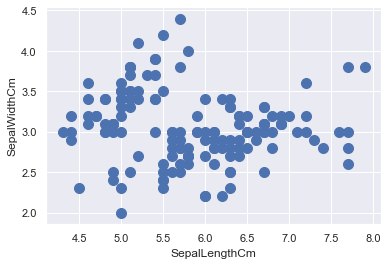

In [49]:
# Use the simplest code possible to create a scatter plot using the Sepal Length and Sepal Width
plt.scatter(data['SepalLengthCm'],data['SepalWidthCm'], s = 100)
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.show

### Cluster Patterns/Distributions of the Iris dataset on the basis of the 3 Species

<function matplotlib.pyplot.show(*args, **kw)>

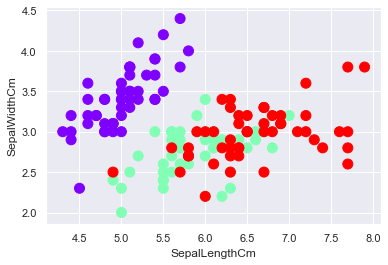

In [50]:
# Use the simplest code possible to create a scatter plot using the Sepal Width, Sepal Length and Species
plt.scatter(data['SepalLengthCm'],data['SepalWidthCm'], c = data_mapped['Species'], cmap = 'rainbow', s = 100)
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.show

In [51]:
# iloc is a method used to 'slice' data to filter the unused columns
x = data.iloc[:,0:2]
# for this particular case, we are choosing columns 1 and 2
# Note column indices in Python start from 0

In [52]:
x

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


## Optimum clustering calculation using K-means and Elbow method to select best fit 

In [53]:
#Calculating WCSS
wcss = []

for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [54]:
wcss

[130.18093333333334,
 57.982406042078765,
 37.12370212765957,
 27.962171178088646,
 20.97661980044561,
 17.45397494637495]

#### The Elbow Method

Text(0, 0.5, 'Within-cluster Sum of Squares')

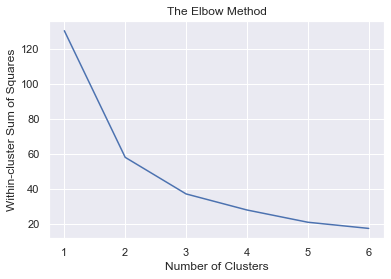

In [55]:
number_clusters = range(1,7)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-cluster Sum of Squares')

### Plotting the Centroid of the clusters

In [56]:
# Applying kmeans to the dataset / Creating the kmeans classifier
x = data.iloc[:,0:2].values
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

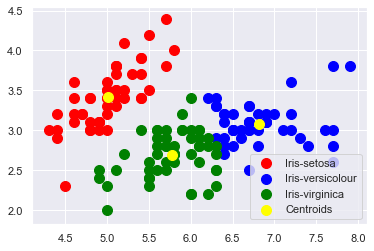

In [57]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [58]:
kmeans = KMeans()

In [59]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [60]:
identify_clusters = kmeans.fit_predict(x)
identify_clusters

array([2, 0, 0, 0, 2, 5, 0, 2, 0, 0, 5, 0, 0, 0, 5, 5, 5, 2, 5, 5, 2, 2,
       0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 5, 5, 0, 2, 2, 0, 0, 2, 2, 6, 0, 2,
       5, 0, 5, 0, 5, 2, 1, 1, 1, 4, 7, 4, 1, 6, 1, 6, 6, 4, 7, 7, 4, 1,
       4, 4, 7, 4, 4, 7, 7, 7, 7, 1, 1, 1, 7, 4, 4, 4, 4, 7, 4, 1, 1, 7,
       4, 4, 4, 7, 4, 6, 4, 4, 4, 7, 6, 4, 1, 4, 3, 7, 1, 3, 6, 3, 7, 3,
       1, 7, 1, 4, 4, 1, 1, 3, 3, 7, 1, 4, 3, 7, 1, 3, 7, 7, 7, 3, 3, 3,
       7, 7, 7, 3, 1, 1, 7, 1, 1, 1, 4, 1, 1, 1, 7, 1, 1, 4])